<a href="https://colab.research.google.com/github/tevfikcagridural/tevfikcagridural.github.io/blob/master/Prepocessing_effects_on_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:
- https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

- https://www.reddit.com/r/datascience/comments/x89x48/is_it_normal_that_more_than_90_of_the_pca/?utm_source=share&utm_medium=ios_app&utm_name=iossmf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.covariance import EmpiricalCovariance
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv')

In [ ]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df = df.select_dtypes('number')

# No preprocess

In [ ]:
np_pca = PCA().fit(df)

<BarContainer object of 4 artists>

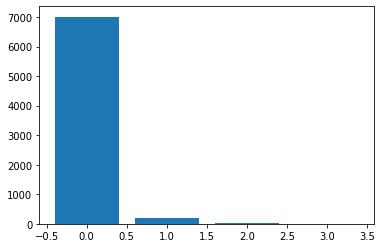

In [ ]:
plt.bar(x=list(range(0,4)), height=np_pca.explained_variance_)

In [ ]:
cov = EmpiricalCovariance().fit(df.select_dtypes('number')).covariance_
cov_df_np = pd.DataFrame(cov, columns=df.columns, index=df.columns)

In [ ]:
cov_df_np

,Murder,Assault,UrbanPop,Rape
Murder,18.591056,285.24112,4.29848,22.531584
Assault,285.241120,6806.26240,306.02960,508.883680
UrbanPop,4.298480,306.02960,205.32840,54.652720
Rape,22.531584,508.88368,54.65272,85.974576


# Standard Scaler

In [ ]:
scaler = StandardScaler()
X_ss = scaler.fit_transform(df)

<BarContainer object of 4 artists>

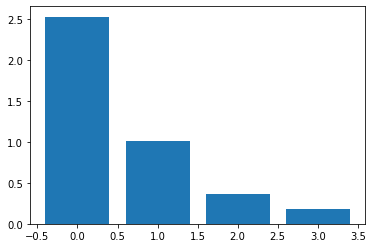

In [51]:
pca_ss = PCA().fit(X_ss)
plt.bar(x=list(range(4)), height=pca_ss.explained_variance_)

In [54]:
cov_ss = EmpiricalCovariance().fit(X_ss).covariance_
cov_df_ss = pd.DataFrame(cov_ss, columns=df.columns, index=df.columns)
cov_df_ss

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# MinMax Scaler

<BarContainer object of 4 artists>

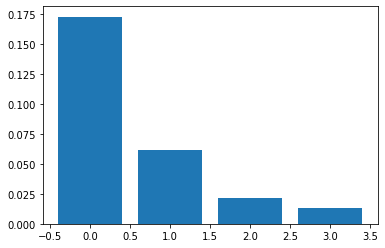

In [52]:
mms = MinMaxScaler()
X_mms = mms.fit_transform(df)
pca_mms = PCA().fit(X_mms)
plt.bar(list(range(4)), height=pca_mms.explained_variance_)

In [56]:
cov_mms = EmpiricalCovariance().fit(X_mms).covariance_
cov_df_mms = pd.DataFrame(cov_mms, columns=df.columns, index=df.columns)
cov_df_mms

,Murder,Assault,UrbanPop,Rape
Murder,0.067466,0.058847,0.004389,0.035073
Assault,0.058847,0.079826,0.017764,0.045032
UrbanPop,0.004389,0.017764,0.058985,0.023936
Rape,0.035073,0.045032,0.023936,0.057405


# Normalize

<BarContainer object of 4 artists>

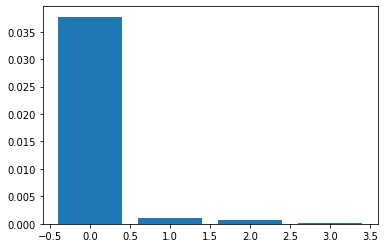

In [58]:
X_n = normalize(df)
pca_n = PCA().fit(X_n)
plt.bar(list(range(4)), pca_n.explained_variance_)

In [60]:
cov_n = EmpiricalCovariance().fit(X_n).covariance_
cov_df_n = pd.DataFrame(cov_n, columns=df.columns, index=df.columns)
cov_df_n

,Murder,Assault,UrbanPop,Rape
Murder,0.000221,0.000371,-0.000778,0.000043
Assault,0.000371,0.010125,-0.015817,-0.001582
UrbanPop,-0.000778,-0.015817,0.027313,0.002456
Rape,0.000043,-0.001582,0.002456,0.001245
